In [15]:
# Import the classical libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns

Index(['Unnamed: 0', 'Radius', 'Electric potential', 'Electric field'], dtype='object')


<ipython-input-18-74532a02a5a4>:12: RuntimeWarning: divide by zero encountered in log
  radius = np.log(radius)
<ipython-input-18-74532a02a5a4>:13: RuntimeWarning: divide by zero encountered in log
  phi = np.log(phi)
<ipython-input-18-74532a02a5a4>:14: RuntimeWarning: divide by zero encountered in log
  E = np.log(E)


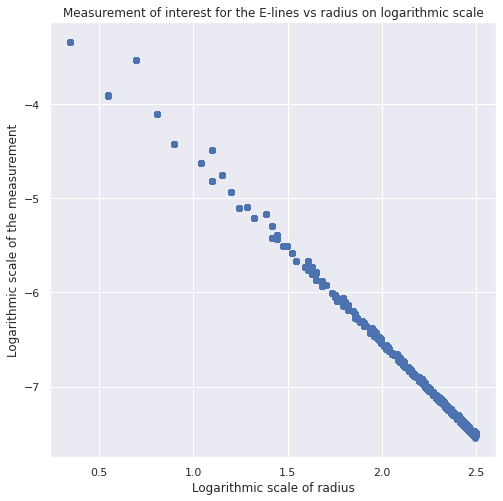

In [18]:
# Open the csv file
df_E = pd.read_csv("Radius_phi_E.csv")
print(df_E.columns)

# Store the electric potential values into a numpy array and
# reshape the potential into a 3D numpy array
radius = df_E["Radius"].to_numpy()
phi = df_E["Electric potential"].to_numpy()
E = df_E["Electric field"].to_numpy()

# Convert the dataset into logarithmic scale
radius = np.log(radius)
phi = np.log(phi)
E = np.log(E)

# Filter the dataset for radius smaller than 2.5 for
# the electric field or 1.5 for the electric potential
radius_analysis = radius[(radius < 2.5) & (radius > 0)]
E_analysis = E[np.where((radius < 2.5) & (radius > 0))]
phi_analysis = phi[np.where((radius < 2.5) & (radius > 0))]

# Plot the overall datasets. choose freely between radius 
# vs electric potential or the electric field
sns.set_theme()
plt.figure(figsize=(8,8))
plt.scatter(radius_analysis, E_analysis)
plt.title("Measurement of interest for the E-lines vs radius on logarithmic scale")
plt.xlabel("Logarithmic scale of radius")
plt.ylabel("Logarithmic scale of the measurement")
plt.show()

The determined power of the variable exponential is: -1.9944688999111222
The standard error in the estimation is: 0.000865446139760553


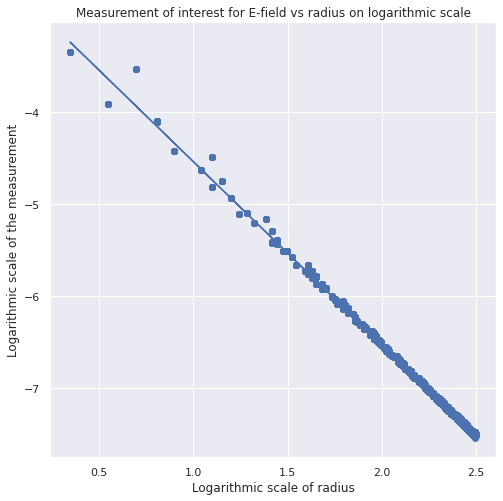

In [19]:
# Once again, choose freely between electric potential or electric field
# Initial guess parameters:
# phi analysis ==> p0 = [-1, -3]
# E analysis ==> p0 = [-2, -2.5]

# Do the line fitting function firstly
def fit_line(x,a,b):
        return x*a + b
    
# Now import the optimize.curve_fit library
popt, pcov = scipy.optimize.curve_fit(fit_line, radius_analysis, E_analysis, p0=np.array([-2, -2.5]))

# Print the overall results
print("The determined power of the variable exponential is: " + str(popt[0]))
print("The standard error in the estimation is: " + str(np.sqrt(pcov[0][0])))

plt.figure(figsize=(8,8))
plt.scatter(radius_analysis, E_analysis)
plt.plot(radius_analysis, fit_line(radius_analysis, popt[0], popt[1]))
plt.title("Measurement of interest for E-field vs radius on logarithmic scale")
plt.xlabel("Logarithmic scale of radius")
plt.ylabel("Logarithmic scale of the measurement")
plt.show()

The determined power of the variable exponential is: -0.9782712354114034
The standard error in the estimation is: 0.0009781264153297376


<ipython-input-20-d08f2c08a1a9>:7: RuntimeWarning: divide by zero encountered in log
  radius_B = np.log(df_B["Radius"].to_numpy())
<ipython-input-20-d08f2c08a1a9>:8: RuntimeWarning: divide by zero encountered in log
  A = np.log(df_B["Magnetic potential"].to_numpy())
<ipython-input-20-d08f2c08a1a9>:9: RuntimeWarning: divide by zero encountered in log
  B = np.log(df_B["Magnetic field"].to_numpy())


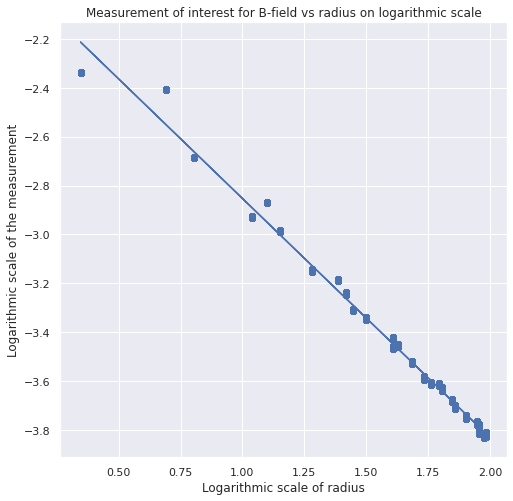

In [20]:
# Now open the csv file for the magnetic potential
df_B = pd.read_csv("Radius_A_B.csv")
df_B.columns

# Store the variables into numpy arrays and convert
# to logarithmic scales
radius_B = np.log(df_B["Radius"].to_numpy())
A = np.log(df_B["Magnetic potential"].to_numpy())
B = np.log(df_B["Magnetic field"].to_numpy())

radius_analysis = radius_B[(radius_B < 2) & (radius_B > 0)]
A_analysis = A[np.where((radius_B < 2) & (radius_B > 0))]
B_analysis = B[np.where((radius_B < 2) & (radius_B > 0))]

# Perform the parameter fitting
popt, pcov = scipy.optimize.curve_fit(fit_line, radius_analysis, B_analysis, p0=np.array([-1, -2.5]))

# Print the overall results
print("The determined power of the variable exponential is: " + str(popt[0]))
print("The standard error in the estimation is: " + str(np.sqrt(pcov[0][0])))

plt.figure(figsize=(8,8))
plt.scatter(radius_analysis, B_analysis)
plt.plot(radius_analysis, fit_line(radius_analysis, popt[0], popt[1]))
plt.title("Measurement of interest for B-field vs radius on logarithmic scale")
plt.xlabel("Logarithmic scale of radius")
plt.ylabel("Logarithmic scale of the measurement")
plt.show()